# Sktime workshop: Pycon Colombia 2025

![](imgs/sktime-logo.png)

## Agenda for today

1. **Univariate timeseries forecasting with sktime** (20 min)
   1. Key concepts in forecasting
   2. Univariate forecasting with statistical models
   3. Metrics and evaluation
2. **Forecasting panel data with sktime** (30 min)
   1. Data representation for panel data
   2. Up-casting feature in sktime
   3. Panel forecasting with global models
3. **Hierarchical forecasting with sktime** (20 min)
   1. Data representation for hierarchical data
   2. Motivation
   3. Hierarchical reconciliation
4. **Deep learning models and Foundation models in sktime** (20 min)
   1. Deep learning models for forecasting
   2. Foundation models for forecasting

# 1. Univariate timeseries forecasting with sktime

* Synthetic dataset of sales of a retail store
* We will first consider the case of univariate forecasting
  * Consider we need to **forecast total sales in a warehouse**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

In [3]:
from pycon_workshop.dataset import PyConWorkshopDataset

dataset = PyConWorkshopDataset()

y_train, y_test = dataset.load("y_train", "y_test")

In [4]:
y_train

,sales
date,
2022-01-01,21
2022-01-02,36
2022-01-03,33
2022-01-04,29
2022-01-05,46
...,...
2025-06-24,1074
2025-06-25,958
2025-06-26,1008


(<Figure size 1600x400 with 1 Axes>,
 <Axes: title={'center': 'y_train and y_test time series'}, ylabel='sales'>)

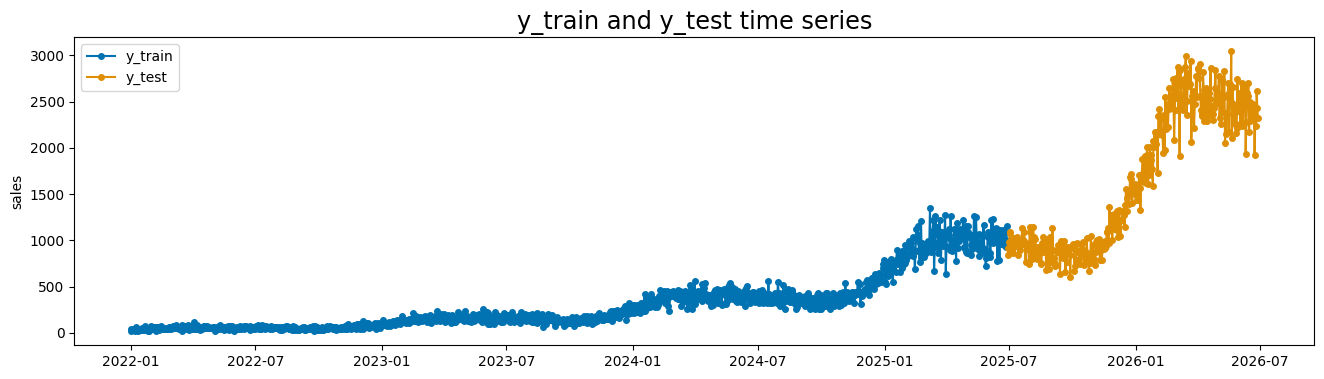

In [5]:
from sktime.utils.plotting import plot_series

plot_series(y_train, y_test, labels=["y_train", "y_test"], title="y_train and y_test time series")

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

model = ExponentialSmoothing(trend="mul", seasonal="mul", sp=365)
model.fit(y_train)

/Users/felipeangelim/Workspace/sktime-workshop-pycon-colombia-2025/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/felipeangelim/Workspace/sktime-workshop-pycon-colombia-2025/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
y_pred = model.predict(fh=[1, 2, 3, 4, 5])
y_pred

,sales
2025-06-29,1020.111068
2025-06-30,1022.647985
2025-07-01,1025.106696
2025-07-02,1027.489614
2025-07-03,1029.799073


In [ ]:
fh = pd.date_range("2025-06-29", "2025-07-03", freq="D")
y_pred = model.predict(fh=fh)
y_pred

,sales
2025-06-29,1020.111068
2025-06-30,1022.647985
2025-07-01,1025.106696
2025-07-02,1027.489614
2025-07-03,1029.799073


(<Figure size 1600x400 with 1 Axes>,
 <Axes: title={'center': 'y_train, y_test and y_pred time series'}, ylabel='sales'>)

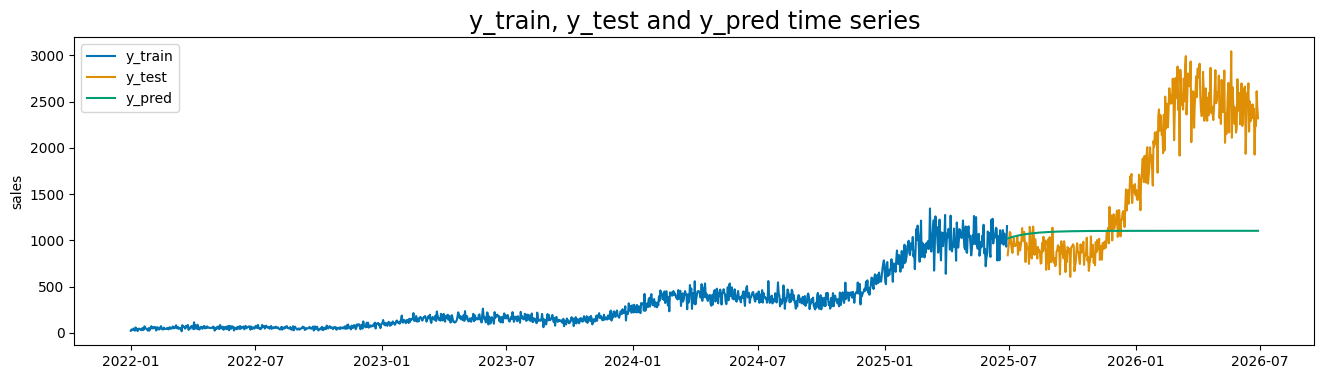

In [ ]:
fh = y_test.index
y_pred = model.predict(fh=fh)


plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], title="y_train, y_test and y_pred time series",markers=[None]*3)

## Key concepts in forecasting

### Data

1. **Forecasting horizon**: The number of time steps into the future we want to predict.
2. **Target variable**: The variable we want to predict, often referred to as `y` (e.g. total sales).
3. **Features**: Additional variables that can help improve the forecast, often referred to as `X` (e.g. promotions, holidays).

### Timeseries components

1. **Trend**: Long-term movement in the data.
2. **Seasonality**: Regular patterns that repeat over time (e.g. weekly,
3. **Noise**: Random fluctuations in the data that cannot be explained by trend or seasonality.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

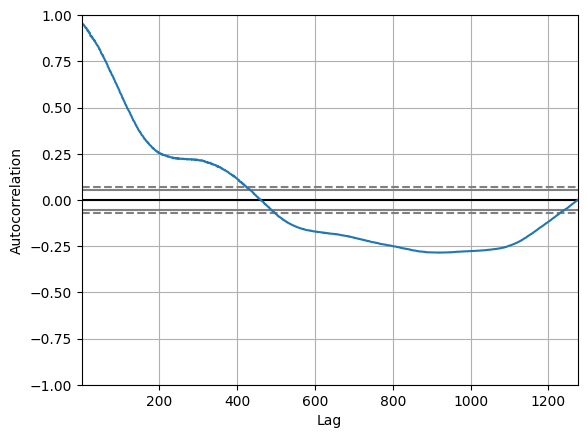

In [ ]:
import pandas as pd

pd.plotting.autocorrelation_plot(y_train)

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

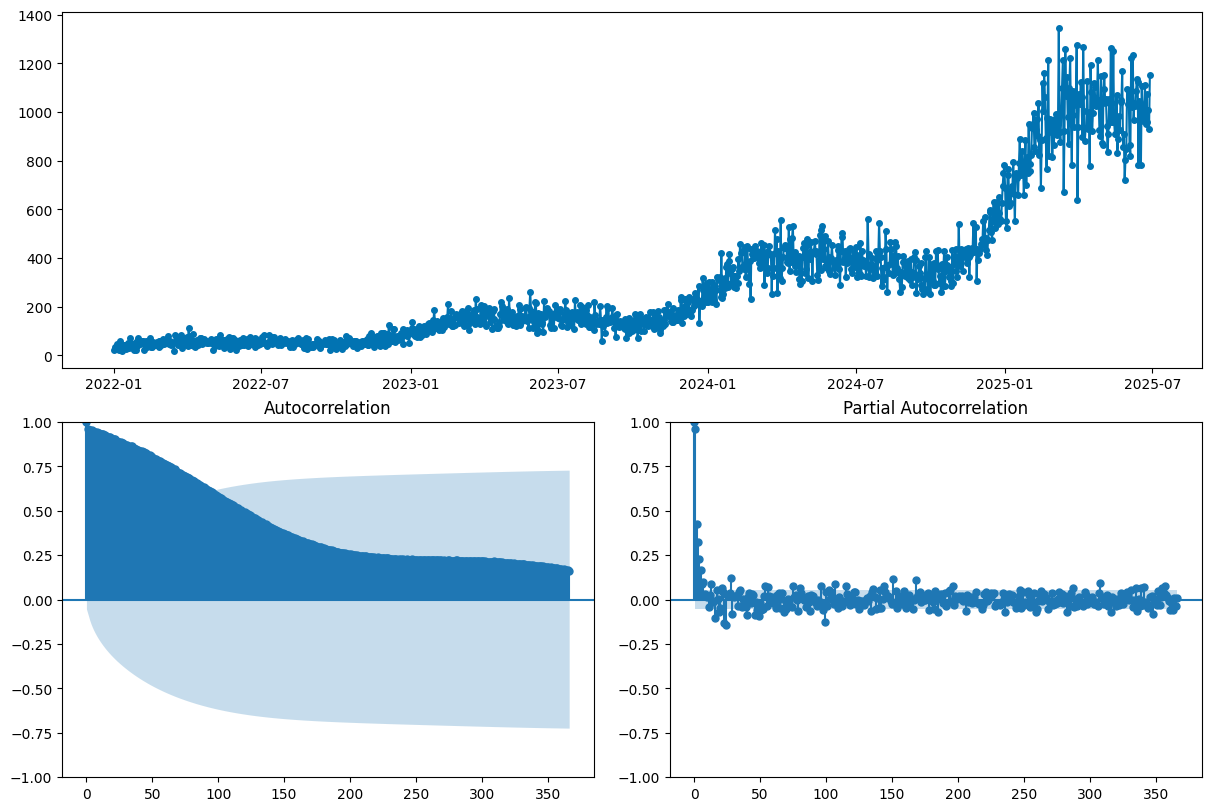

In [ ]:
from sktime.transformations.series.detrend import Detrender

Detrender().fit_transform(y_train)


* Key components during fit
  * `y`: target variable
  * `X`: features (optional)
  * `fh`: forecasting horizon (optional)
* Key components during predict
  * `fh`: forecasting horizon (optional)
  * `X`: features (optional)
  

In [7]:
X_train

,promo,macro_index
date,,
2022-01-01,0.08,98.196255
2022-01-02,0.08,99.613209
2022-01-03,0.04,103.098493
2022-01-04,0.12,101.083814
2022-01-05,0.02,102.708703
...,...,...
2025-03-26,0.06,99.498749
2025-03-27,0.10,103.054713
2025-03-28,0.04,98.394318


## Panel

In [8]:
from pycon_workshop.dataset import PyConWorkshopDataset

dataset = PyConWorkshopDataset("panel")

X_train, y_train = dataset.load("X_train", "y_train")

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='sales'>)

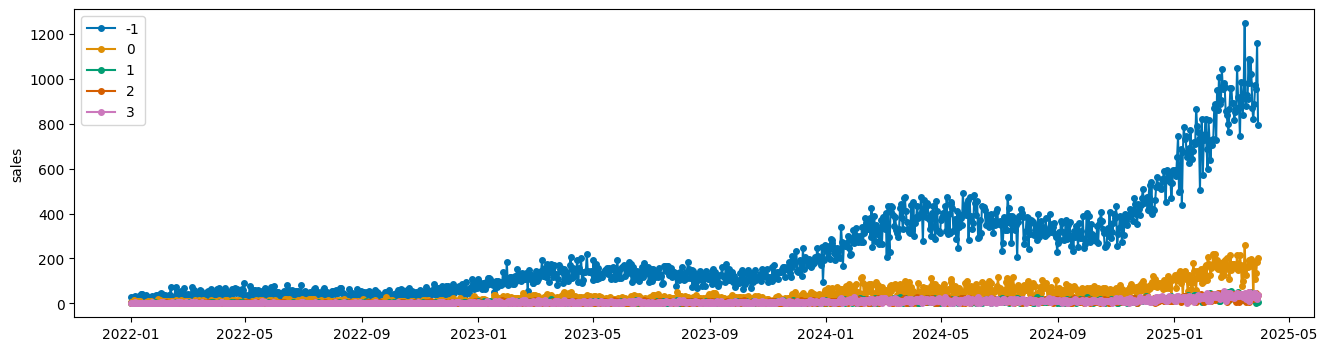

In [10]:
plot_series(*[y_train.loc[idx] for idx in y_train.index.get_level_values(0).unique()],
            labels=y_train.index.get_level_values(0).unique())

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='sales'>)

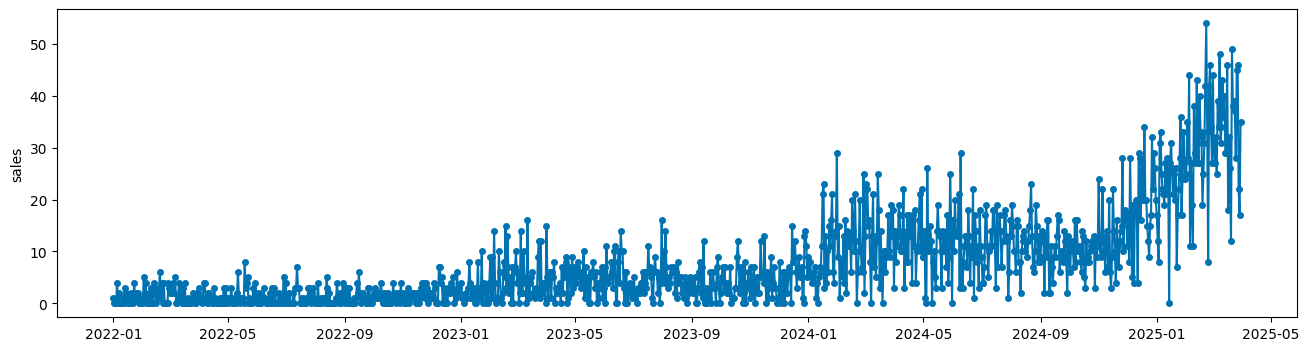

In [11]:
plot_series(y_train.loc[3])